In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
phishing_df = pd.read_csv('dataset_phishing.csv')

In [3]:
lst = ['www.google.com', 'www.youtube.com']

In [4]:
for url in lst:
    drop = phishing_df.loc[(phishing_df['url'].str.contains(url)) & (phishing_df['status'] == 'phishing')] # not really phishing links
    phishing_df.drop(drop.index, inplace=True)

In [5]:
url_features = phishing_df.columns[1:55]
label = phishing_df['status'] 

# Only use features from dataset related to url
phishing_df = phishing_df[url_features]
phishing_df['status'] = label
phishing_df.drop(columns=['nb_redirection', 'nb_external_redirection'], inplace=True) # issues with requests
phishing_df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,status
0,37,19,0,3,0,0,0,0,0,0,...,11,6,5.750000,7.0,4.500000,0,0,0,0,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,19,32,15.750000,19.0,14.666667,0,0,0,0,phishing
2,126,50,1,4,1,0,1,2,0,3,...,13,17,8.250000,8.4,8.142857,0,0,0,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,5,0,5.000000,5.0,0.000000,0,0,0,0,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,7,11,6.333333,5.0,7.000000,0,0,0,0,legitimate


### Exploring the Data

In [6]:
phishing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11418 entries, 0 to 11429
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   length_url          11418 non-null  int64  
 1   length_hostname     11418 non-null  int64  
 2   ip                  11418 non-null  int64  
 3   nb_dots             11418 non-null  int64  
 4   nb_hyphens          11418 non-null  int64  
 5   nb_at               11418 non-null  int64  
 6   nb_qm               11418 non-null  int64  
 7   nb_and              11418 non-null  int64  
 8   nb_or               11418 non-null  int64  
 9   nb_eq               11418 non-null  int64  
 10  nb_underscore       11418 non-null  int64  
 11  nb_tilde            11418 non-null  int64  
 12  nb_percent          11418 non-null  int64  
 13  nb_slash            11418 non-null  int64  
 14  nb_star             11418 non-null  int64  
 15  nb_colon            11418 non-null  int64  
 16  nb_c

In [7]:
phishing_df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path
count,11418.000000,11418.000000,11418.000000,11418.00000,11418.000000,11418.000000,11418.000000,11418.000000,11418.0,11418.000000,...,11418.000000,11418.000000,11418.000000,11418.000000,11418.000000,11418.000000,11418.000000,11418.000000,11418.000000,11418.000000
mean,60.988264,21.097127,0.150201,2.47828,0.997548,0.022246,0.139954,0.157033,0.0,0.287003,...,15.380102,10.472587,10.542652,7.260310,7.681371,5.091393,0.327115,0.103258,0.004116,0.004905
std,55.125834,10.780707,0.357284,1.36733,2.087764,0.155580,0.362027,0.798606,0.0,0.974785,...,22.087812,4.932548,23.079475,4.147649,3.578866,7.150650,0.841635,0.304309,0.064029,0.069864
min,12.000000,4.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,9.000000,7.000000,0.000000,5.250000,5.333333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,19.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,11.000000,10.000000,7.000000,6.500000,7.000000,4.857143,0.000000,0.000000,0.000000,0.000000
75%,71.000000,24.000000,0.000000,3.00000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,16.000000,13.000000,11.000000,8.000000,9.000000,6.714286,0.000000,0.000000,0.000000,0.000000
max,1641.000000,214.000000,1.000000,24.00000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,829.000000,62.000000,829.000000,128.250000,39.000000,250.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
phishing_df['status'].value_counts()

legitimate    5715
phishing      5703
Name: status, dtype: int64

In [9]:
phishing_df['status'].replace(['legitimate', 'phishing'], [0, 1], inplace=True)

There is an equal number of legitimate and phishing links present in the dataset.

In [10]:
from sklearn.feature_selection import mutual_info_classif

In [11]:
X = phishing_df.drop(columns = ['status'])
y = phishing_df['status']

In [12]:
mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
mi_series

longest_word_path     0.118636
ratio_digits_url      0.108635
nb_www                0.103927
shortest_word_host    0.080727
phish_hints           0.080613
avg_word_host         0.080180
char_repeat           0.077773
avg_word_path         0.077233
length_url            0.075474
longest_words_raw     0.074368
avg_words_raw         0.070181
length_hostname       0.063865
nb_dots               0.062773
ratio_digits_host     0.057764
nb_qm                 0.049720
shortest_words_raw    0.047438
nb_eq                 0.044095
shortest_word_path    0.043811
ip                    0.043323
nb_subdomains         0.036249
length_words_raw      0.035649
nb_hyphens            0.035101
nb_slash              0.034366
nb_and                0.030057
tld_in_subdomain      0.027488
longest_word_host     0.024928
prefix_suffix         0.023320
nb_com                0.016661
nb_underscore         0.014686
nb_semicolumn         0.013904
nb_at                 0.012215
nb_space              0.010581
abnormal

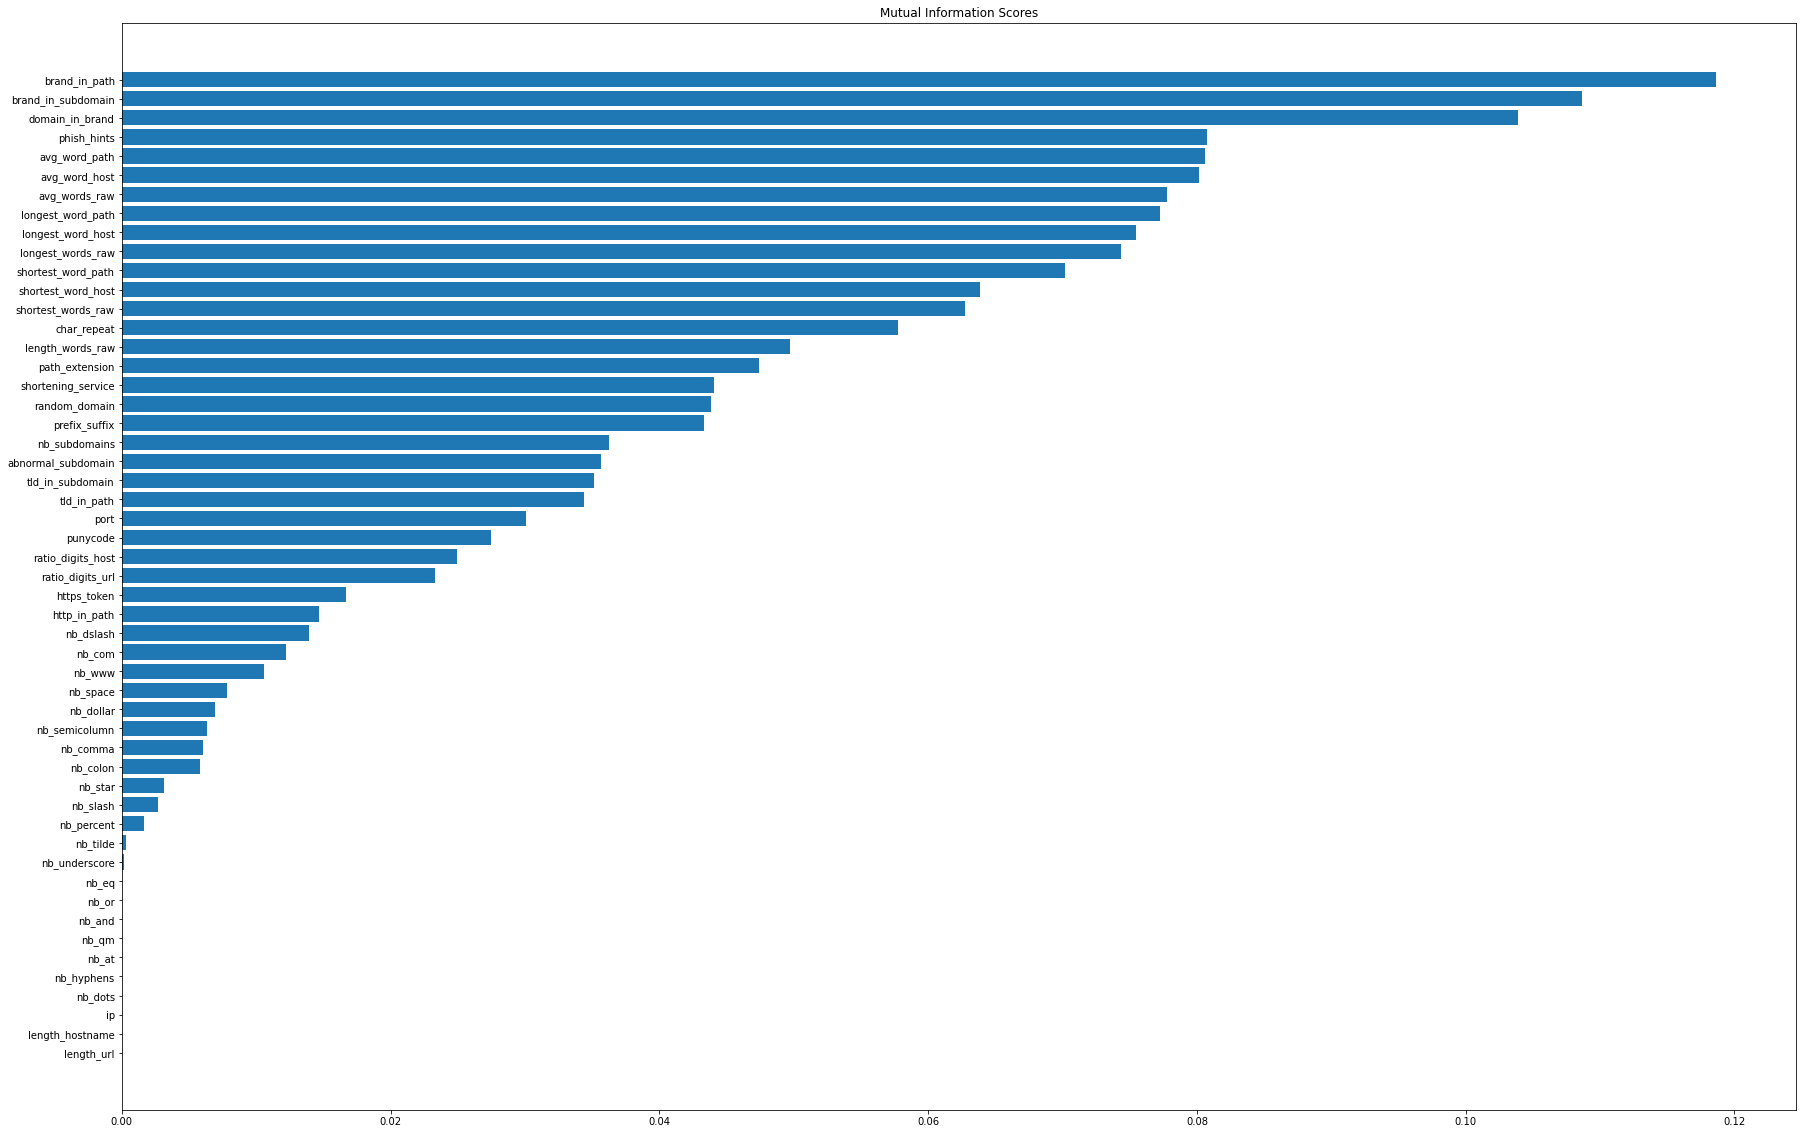

In [13]:
width = np.arange(len(mi_scores))

plt.figure(figsize=(30, 20))
plt.barh(width, np.sort(mi_scores))
plt.yticks(width, X.columns)
plt.title("Mutual Information Scores")

plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [15]:
def train_rfc(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    rfc = RandomForestClassifier(n_estimators=200, random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    
    return accuracy, precision, recall, f1

In [16]:
n = np.count_nonzero(mi_scores)
features = mi_series.index.to_numpy()

y = phishing_df['status']
scores = []

for i in range(10, n, 1):
    top_n_features = features[:i]
    X = phishing_df[top_n_features]
    
    accuracy, precision, recall, f1 = train_rfc(X, y)
    scores.append([i, accuracy, precision, recall, f1])

In [17]:
results = pd.DataFrame(scores, columns=['num_features', 'accuracy', 'precision', 'recall', 'f1-score'])
results

,num_features,accuracy,precision,recall,f1-score
0,10,0.860595,0.865452,0.857044,0.861227
1,11,0.859545,0.859145,0.859748,0.859446
2,12,0.859895,0.857744,0.861365,0.859551
3,13,0.875657,0.882270,0.870678,0.876436
4,14,0.875306,0.880869,0.871102,0.875958
5,15,0.878109,0.878066,0.878066,0.878066
6,16,0.879510,0.886475,0.874223,0.880306
7,17,0.883713,0.889979,0.878893,0.884401
8,18,0.884063,0.887877,0.881085,0.884468
9,19,0.879510,0.885074,0.875260,0.880139


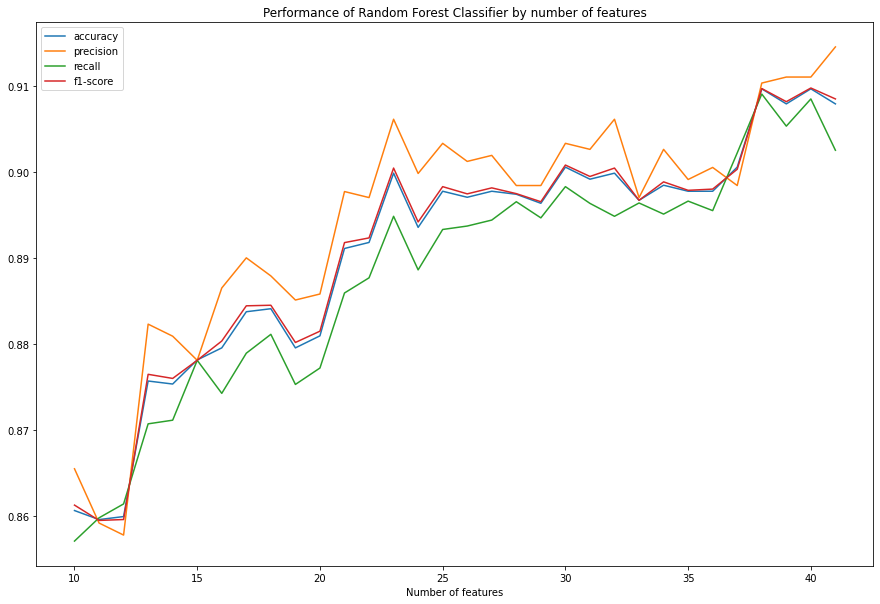

In [18]:
plt.figure(figsize=(15, 10))
plt.plot(results['num_features'], results['accuracy'], label='accuracy')
plt.plot(results['num_features'], results['precision'], label='precision')
plt.plot(results['num_features'], results['recall'], label='recall')
plt.plot(results['num_features'], results['f1-score'], label='f1-score')

plt.title('Performance of Random Forest Classifier by number of features')
plt.xlabel('Number of features')
plt.legend()
plt.show()

In [19]:
np.argwhere(results['accuracy'].to_numpy() == np.amax(results['accuracy'].to_numpy())).flatten()

array([28, 30])

In [20]:
np.argwhere(results['f1-score'].to_numpy() == np.amax(results['f1-score'].to_numpy())).flatten()

array([30])

In [26]:
best_n = results['num_features'][30]
best_n

40

In [27]:
X = phishing_df[features[:best_n]]
y = phishing_df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [28]:
print(f'accuracy: {accuracy_score(y_pred, y_test)}')
print(classification_report(y_test, y_pred))

accuracy: 0.9096322241681261
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1428
           1       0.91      0.91      0.91      1427

    accuracy                           0.91      2855
   macro avg       0.91      0.91      0.91      2855
weighted avg       0.91      0.91      0.91      2855



In [29]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [30]:
# save best features for later
with open('features.pkl', 'wb') as f:
    pickle.dump(features[:best_n], f)